C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Unrecognized marker style '0'

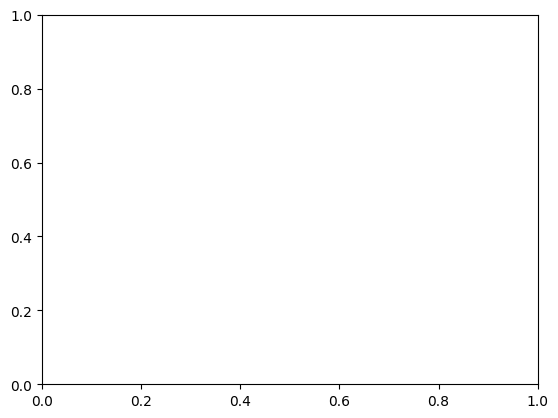

In [12]:
from sklearn.cluster import KMeans, BisectingKMeans,AgglomerativeClustering, DBSCAN  #another is grid base clustering 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics

# Data points
dataset1 = np.array([   #2d data is easy to visualize ///
 [0.4005, 0.5306], # p1
 [0.2148, 0.3854], # p2
 [0.3457, 0.3156], # p3
 [0.2652, 0.1875], # p4
 [0.0789, 0.4139], # p5
 [0.4548, 0.3022]  # p6
])
# Number of clusters
k = 2
#Initialize Kmeans with Number of cluster
kmeans=KMeans(n_clusters=k,random_state=0)#Fit the KMeans
kmeans.fit(dataset1)
KMeans(n_clusters=2,random_state=0)

#get the cluster centers(centroids)
centroids=kmeans.cluster_centers_
#get the labels of each points
labels=kmeans.labels_
#plot the data points
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='0')
#plot the centroids
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='x',s=200,label='Centroids')


# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

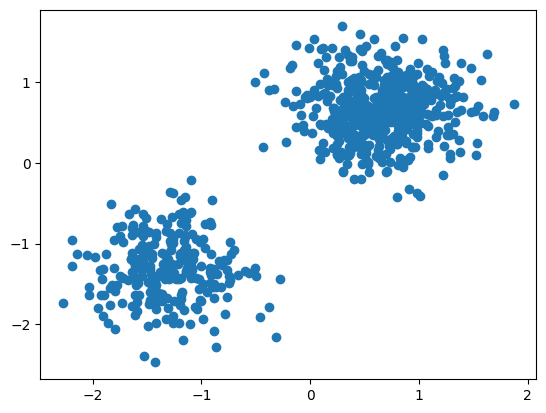

In [ ]:
centers=[[1,1],[-1,-1],[1,1]]
dataset2,labels_true=make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)
dataset2 = StandardScaler().fit_transform(dataset2)
plt.scatter(dataset2[:, 0], dataset2[:, 1])
plt.show()

C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


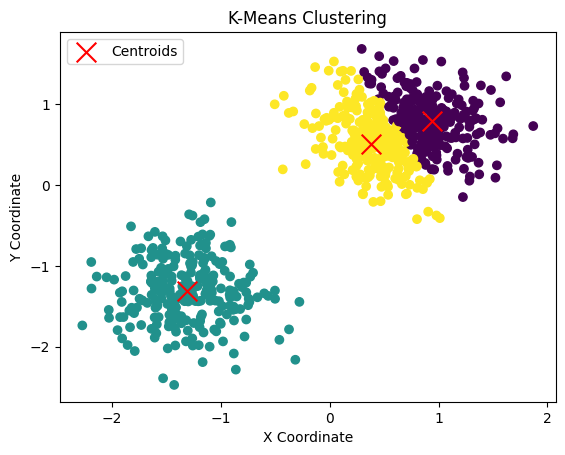

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(dataset2)
KMeans(n_clusters=3, random_state=42)
# Get the cluster centers (centroids)
centroids = kmeans2.cluster_centers_
# Get the labels for each point
labels = kmeans2.labels_
# Plot the data points
plt.scatter(dataset2[:, 0], dataset2[:, 1], c=labels, cmap='viridis', 
marker='o')
# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', 
s=200, label='Centroids')
# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

ValueError: Unrecognized marker style '0'

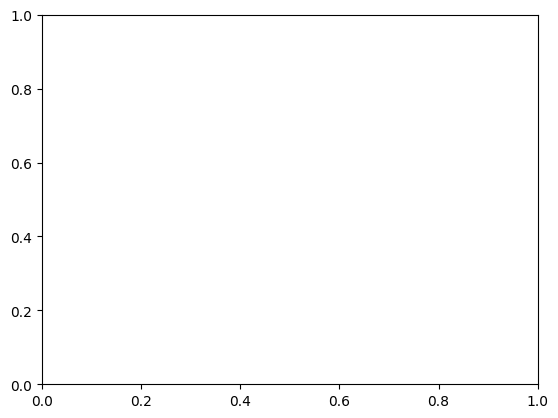

In [13]:
agg=AgglomerativeClustering(linkage='single')
agg.fit(dataset1)
n_clusters=agg.n_clusters
labels=agg.labels_

plt.scatter(dataset1[:,0],dataset1[:,1],c=labels,cmap='viridis',marker='0')
# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


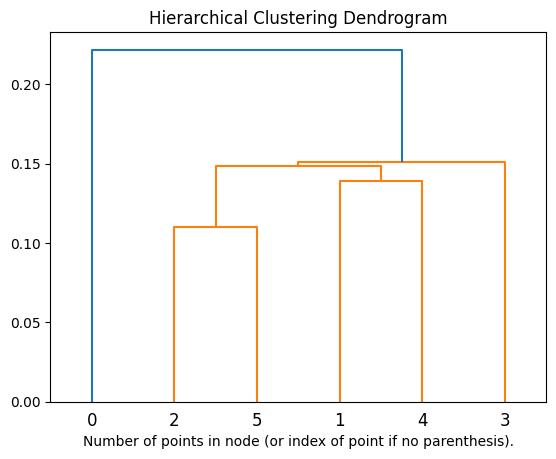

In [18]:
def plot_dendrogram(model, **kwargs):
     # Create linkage matrix and then plot the dendrogram
 # create the counts of samples under each node
 counts = np.zeros(model.children_.shape[0])
 n_samples = len(model.labels_)
 for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
          current_count += 1 # leaf node
        else:
          current_count += counts[child_idx - n_samples]
    counts[i] = current_count
 linkage_matrix = np.column_stack(
 [model.children_, model.distances_, counts]
 ).astype(float)
 # Plot the corresponding dendrogram
 dendrogram(linkage_matrix, **kwargs)
 # setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
linkage='single')
model = model.fit(dataset1)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


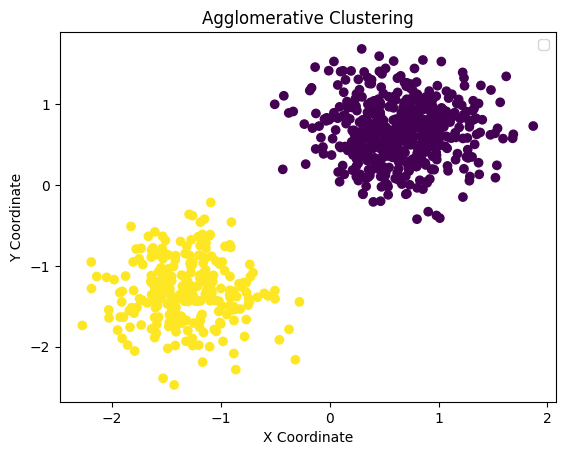

In [19]:
agg2 = AgglomerativeClustering(linkage='ward')   # we can change linkage
agg2.fit(dataset2)
# Get the labels for each point
labels = agg2.labels_
# Plot the data points
plt.scatter(dataset2[:, 0], dataset2[:, 1], c=labels, cmap='viridis',marker='o')
# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


In [21]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset2)
labels = db.labels_

#Number of cluster in labels ,ignoring noise present # it is used for anamoly detection
n_clusters_= len(set(labels))-(1 if -1 in labels else 0)
n_noise_=list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 14


In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, 
labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, 
labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, 
labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,
labels):.3f}")
print(
 "Adjusted Mutual Information:"
 f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(dataset2, 
labels):.3f}")


In [ ]:
#HW #try advance ,Hdbscan advance form
